In [6]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import math
import matplotlib.image as mpimg
%matplotlib inline

# Gowalla 

In [157]:
DATA_FOLDER = '../'
CENTROIDS = DATA_FOLDER+"centroids.xlsx"
centroids= pd.read_excel(CENTROIDS)
centroids=centroids.drop('country',axis=1)
centroids['name']=centroids.name.str.lower()
G_TRIPS = DATA_FOLDER+"country_gowalla_trips.csv"
country_gowalla_trips = pd.read_csv(G_TRIPS,delimiter = ',')

In [185]:
bigG=country_gowalla_trips[country_gowalla_trips['user'] >= 200]

In [264]:
bigG

,country_home,country_checkin,user
284,canada,united states,369
1286,norway,denmark,317
1294,norway,germany,202
1344,norway,sweden,399
1352,norway,united kingdom,201
1794,sweden,denmark,762
1801,sweden,finland,265
1802,sweden,france,428
1805,sweden,germany,671
1821,sweden,italy,272


In [186]:
bigG_merged=bigG.merge(centroids, left_on='country_home', right_on='name').rename(columns={'latitude':'latitude_h','longitude':'longitude_h'}).merge(centroids, left_on='country_checkin', right_on='name').drop(['name_x','name_y'],axis=1).rename(columns={'latitude':'latitude_ch','longitude':'longitude_ch'})


Text(0.5, 1.0, 'Departures from Sweden (Gowalla)')

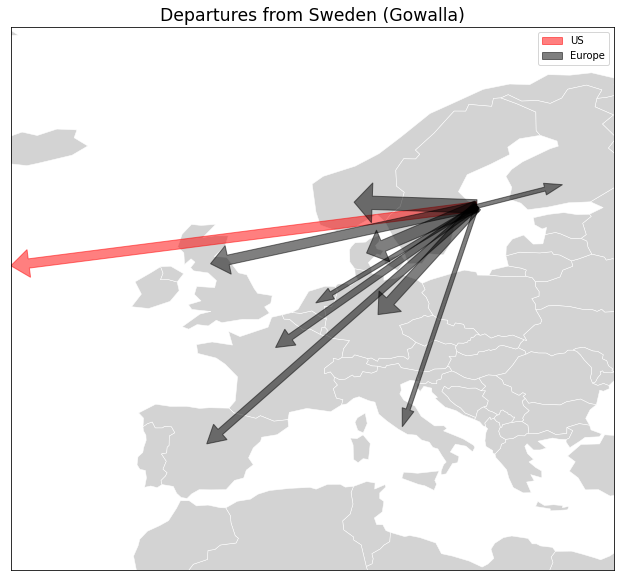

In [273]:
import matplotlib.pyplot as plt
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(color='lightgrey', linewidth=0.5, edgecolor='white',figsize=(20,10))
for i in range(len(bigG_merged)): 
  if bigG_merged['country_home'].iloc[i]=='sweden': 
    if bigG_merged['country_checkin'].iloc[i]=='united states':
      US=plt.arrow(bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_h'].iloc[i], -18.5-bigG_merged['longitude_h'].iloc[i], 55.4-bigG_merged['latitude_h'].iloc[i],width =bigG_merged['user'].iloc[i]/800, color = 'red',label='US',head_length=1.5,alpha=0.5)
    else: 
      europe=plt.arrow(bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_h'].iloc[i], bigG_merged['longitude_ch'].iloc[i]-bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_ch'].iloc[i]-bigG_merged['latitude_h'].iloc[i],width =bigG_merged['user'].iloc[i]/800, label='EU', color = 'black', head_length=1.5,alpha=0.5,length_includes_head=True)
plt.ylim([30,75])
plt.xlim([-20,30])
plt.legend([US,europe],['US','Europe'])
US.axes.get_xaxis().set_visible(False)
US.axes.get_yaxis().set_visible(False)
plt.title('Departures from Sweden (Gowalla)',fontsize='xx-large')

Text(0.5, 1.0, 'Departures from the US (Gowalla)')

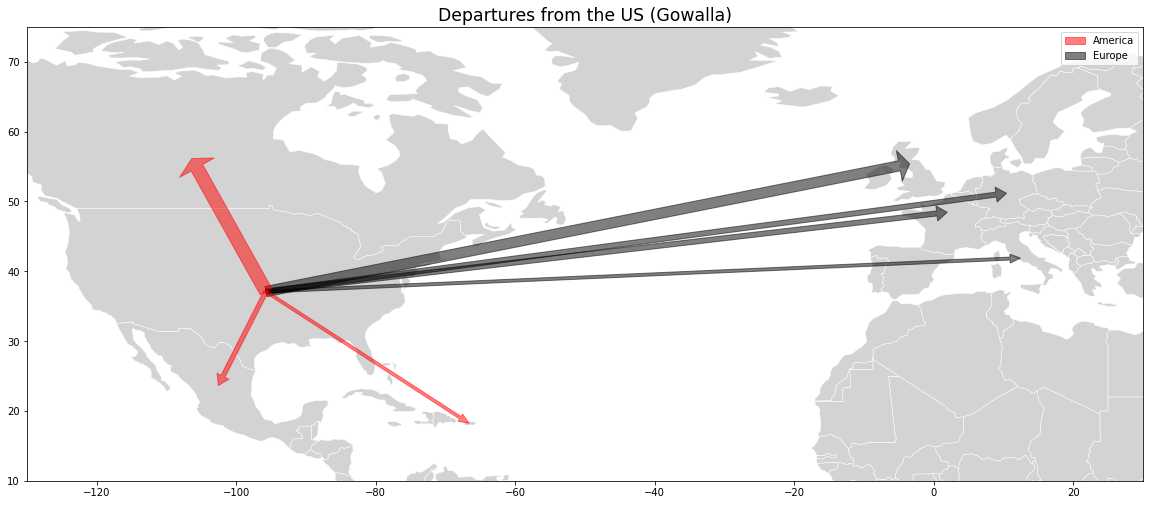

In [228]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(color='lightgrey', linewidth=0.5, edgecolor='white',figsize=(20,10))
for i in range(len(bigG_merged)): 
  if bigG_merged['country_home'].iloc[i]=='united states':  
    if  bigG_merged['country_checkin'].iloc[i] in ['canada', 'mexico', 'puerto rico']: 
      color='red'
      US = plt.arrow(bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_h'].iloc[i], bigG_merged['longitude_ch'].iloc[i]-bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_ch'].iloc[i]-bigG_merged['latitude_h'].iloc[i],width =bigG_merged['user'].iloc[i]/500, color = color, head_length=1.5,alpha=0.5,length_includes_head=True)

    else: 
      color='black'
      europe = plt.arrow(bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_h'].iloc[i], bigG_merged['longitude_ch'].iloc[i]-bigG_merged['longitude_h'].iloc[i], bigG_merged['latitude_ch'].iloc[i]-bigG_merged['latitude_h'].iloc[i],width =bigG_merged['user'].iloc[i]/500, color = color, head_length=1.5,alpha=0.5,length_includes_head=True)
plt.ylim([10,75])
plt.xlim([-130,30])
plt.legend([US,europe],['America','Europe'])
#US.axes.get_xaxis().set_visible(False)
#US.axes.get_yaxis().set_visible(False)
plt.title('Departures from the US (Gowalla)',fontsize='xx-large')

# Brightkite

In [205]:
B_TRIPS = DATA_FOLDER+"country_brightkite_trips.csv"
country_brightkite_trips = pd.read_csv(B_TRIPS,delimiter = ',')

In [254]:
Big_B_Sweden=country_brightkite_trips[country_brightkite_trips['country_home'] == 'sweden'][country_brightkite_trips['user'] >= 50]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [207]:
bigB

,country_home,country_checkin,user
307,canada,united states,250
1089,japan,united states,450
2055,united kingdom,france,223
2135,united kingdom,united states,367
2169,united states,canada,688
2197,united states,france,297
2204,united states,germany,334
2230,united states,italy,243
2232,united states,japan,264
2259,united states,mexico,339


In [257]:
bigB_merged=bigB.merge(centroids, left_on='country_home', right_on='name').rename(columns={'latitude':'latitude_h','longitude':'longitude_h'}).merge(centroids, left_on='country_checkin', right_on='name').drop(['name_x','name_y'],axis=1).rename(columns={'latitude':'latitude_ch','longitude':'longitude_ch'})
bigB_Sweden_merged=Big_B_Sweden.merge(centroids, left_on='country_home', right_on='name').rename(columns={'latitude':'latitude_h','longitude':'longitude_h'}).merge(centroids, left_on='country_checkin', right_on='name').drop(['name_x','name_y'],axis=1).rename(columns={'latitude':'latitude_ch','longitude':'longitude_ch'})


In [260]:
bigB_Sweden_merged

,country_home,country_checkin,user,latitude_h,longitude_h,latitude_ch,longitude_ch
0,sweden,denmark,85,60.128161,18.643501,56.263920,9.501785
1,sweden,germany,68,60.128161,18.643501,51.165691,10.451526
2,sweden,norway,67,60.128161,18.643501,60.472024,8.468946
3,sweden,united kingdom,61,60.128161,18.643501,55.378051,-3.435973
4,sweden,united states,82,60.128161,18.643501,37.090240,-95.712891


Text(0.5, 1.0, 'Departures from the US (Brightkite)')

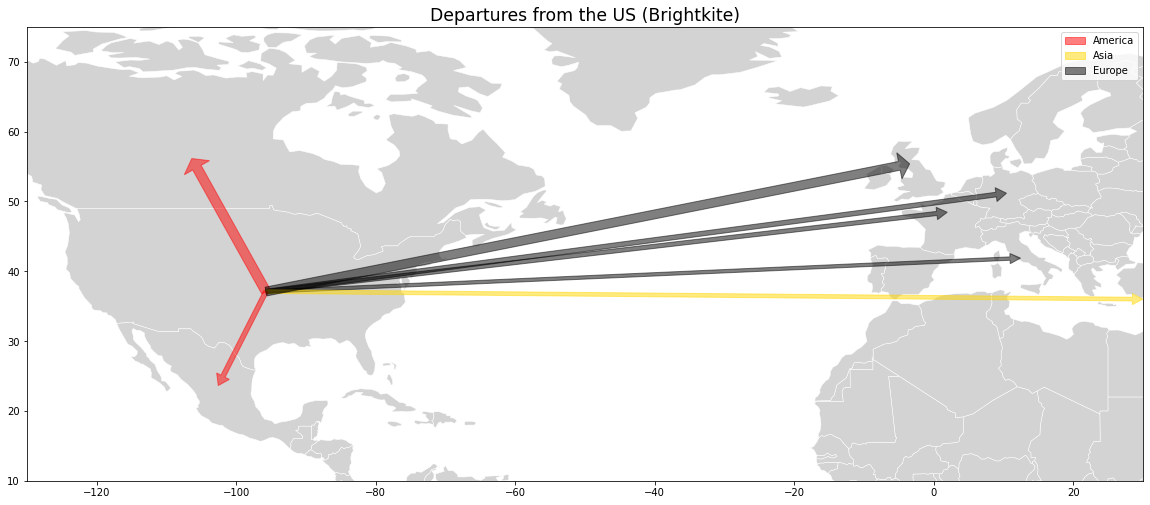

In [234]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(color='lightgrey', linewidth=0.5, edgecolor='white',figsize=(20,10))
for i in range(len(bigB_merged)): 
  if bigB_merged['country_home'].iloc[i]=='united states':  
    if  bigB_merged['country_checkin'].iloc[i] in ['canada', 'mexico', 'puerto rico']: 
      color='red'
      america=plt.arrow(bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_h'].iloc[i], bigB_merged['longitude_ch'].iloc[i]-bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_ch'].iloc[i]-bigB_merged['latitude_h'].iloc[i],width =bigB_merged['user'].iloc[i]/500, color = color, head_length=1.5,alpha=0.5,length_includes_head=True)
    elif  bigB_merged['country_checkin'].iloc[i] == 'japan': 
      color='gold'
      asia=plt.arrow(bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_h'].iloc[i], 30-bigB_merged['longitude_h'].iloc[i], 36-bigB_merged['latitude_h'].iloc[i],width =bigB_merged['user'].iloc[i]/500, color = color, head_length=1.5,alpha=0.5,length_includes_head=True)
    else: 
      color='black'
      europe=plt.arrow(bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_h'].iloc[i], bigB_merged['longitude_ch'].iloc[i]-bigB_merged['longitude_h'].iloc[i], bigB_merged['latitude_ch'].iloc[i]-bigB_merged['latitude_h'].iloc[i],width =bigB_merged['user'].iloc[i]/500, color = color, head_length=1.5,alpha=0.5,length_includes_head=True)
plt.ylim([10,75])
plt.xlim([-130,30])
plt.legend([america, asia, europe], ['America','Asia','Europe'])
#US.axes.get_xaxis().set_visible(False)
#US.axes.get_yaxis().set_visible(False)
plt.title('Departures from the US (Brightkite)',fontsize='xx-large')

Text(0.5, 1.0, 'Departures from Sweden (Brightkite)')

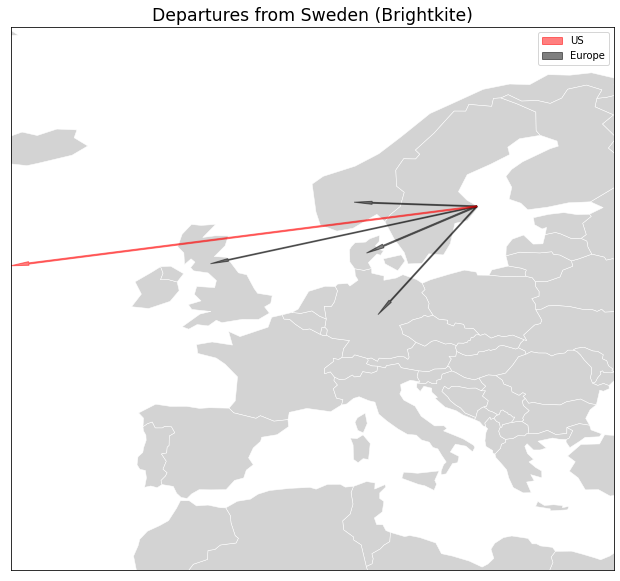

In [263]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(color='lightgrey', linewidth=0.5, edgecolor='white',figsize=(20,10))
for i in range(len(bigB_Sweden_merged)): 
    if bigB_Sweden_merged['country_checkin'].iloc[i]=='united states':
      US=plt.arrow(bigB_Sweden_merged['longitude_h'].iloc[i], bigB_Sweden_merged['latitude_h'].iloc[i], -18.5-bigB_Sweden_merged['longitude_h'].iloc[i], 55.4-bigB_Sweden_merged['latitude_h'].iloc[i],width =bigB_Sweden_merged['user'].iloc[i]/800, color = 'red',label='US',head_length=1.5,alpha=0.5)
    else: 
      europe=plt.arrow(bigB_Sweden_merged['longitude_h'].iloc[i], bigB_Sweden_merged['latitude_h'].iloc[i], bigB_Sweden_merged['longitude_ch'].iloc[i]-bigB_Sweden_merged['longitude_h'].iloc[i], bigB_Sweden_merged['latitude_ch'].iloc[i]-bigB_Sweden_merged['latitude_h'].iloc[i],width =bigB_Sweden_merged['user'].iloc[i]/800, label='EU', color = 'black', head_length=1.5,alpha=0.5,length_includes_head=True)
plt.ylim([30,75])
plt.xlim([-20,30])
plt.legend([US,europe],['US','Europe'])
US.axes.get_xaxis().set_visible(False)
US.axes.get_yaxis().set_visible(False)
plt.title('Departures from Sweden (Brightkite)',fontsize='xx-large')